In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
data= pd.read_csv(r"C:\Users\RHEA TIWARI\Downloads\archive (10)\Mall_Customers.csv")

In [6]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
data.shape
gender_mapping = {'Male': 0, 'Female': 1}
data['Gender_numeric'] = data['Gender'].map(gender_mapping)


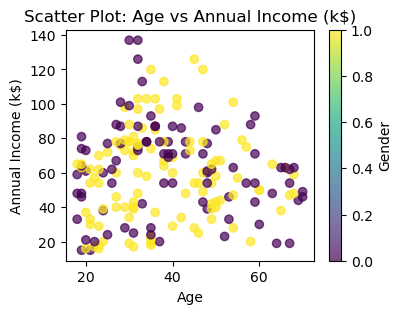

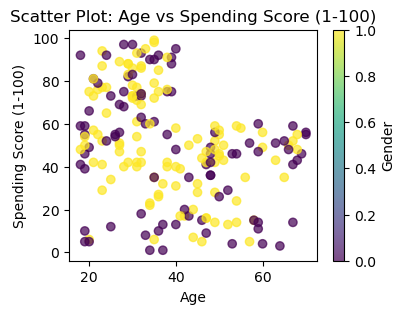

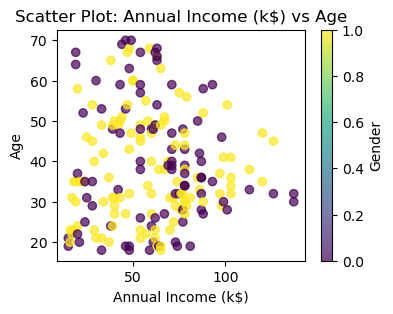

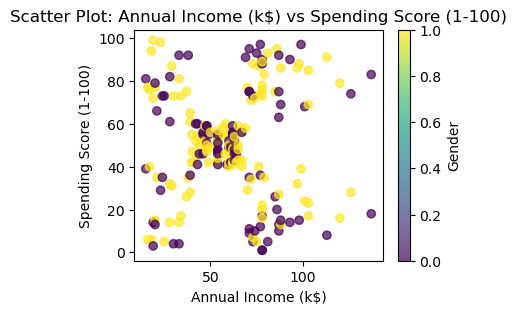

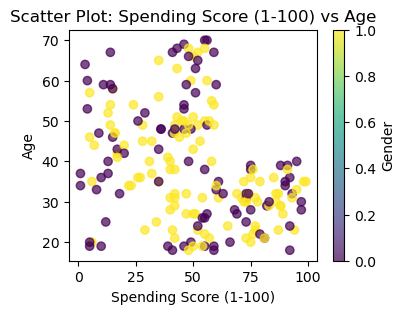

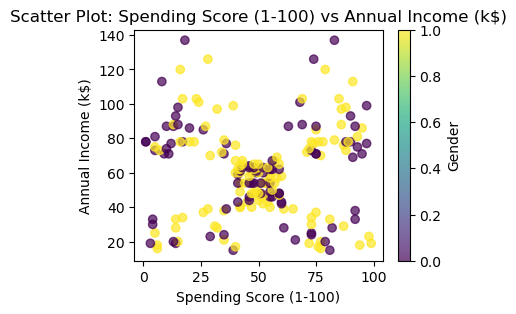

In [9]:
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        if x!=y:
            plt.figure(figsize=(4, 3))
            plt.scatter(data[x], data[y], c=data['Gender_numeric'], cmap='viridis', alpha=0.7)
            plt.xlabel(x)
            plt.ylabel(y)
            plt.title(f'Scatter Plot: {x} vs {y}')
            plt.colorbar(label='Gender')
            plt.show()
        
        
        

In [10]:
new_data=data.iloc[:, [3,4]]


In [11]:
k_c=new_data.sample(n=6).values

In [12]:
k_clusters=data['Annual Income (k$)'].sample(n=5).values

In [13]:
k_c

array([[59, 55],
       [74, 10],
       [88, 15],
       [63, 46],
       [16,  6],
       [24, 35]], dtype=int64)

In [14]:
def closest_centroids(x,centroid):
    idx=np.zeros(x.shape[0],dtype=int)
    for i in range(len(x)):
        dist=[]
        for j in range(len(centroid)):
            dist.append(np.linalg.norm(x[i]-centroid[j]))
        idx[i]=np.argmin(dist)
    return idx

In [15]:
idx=closest_centroids(new_data.values,k_c)

In [16]:
idx


array([5, 5, 4, 5, 5, 5, 4, 0, 4, 5, 4, 0, 4, 5, 4, 5, 5, 5, 5, 0, 5, 5,
       4, 5, 4, 0, 5, 5, 5, 0, 4, 0, 4, 0, 4, 0, 5, 0, 5, 0, 5, 0, 5, 0,
       5, 0, 0, 5, 5, 5, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 3, 0, 0,
       0, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3,
       0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 0, 1, 0, 1, 0,
       3, 0, 1, 0, 1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 3, 0, 2, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 3, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2, 3,
       2, 3])

In [17]:
data['Spending Score (1-100)'].values

array([39, 81,  6, 77, 40, 76,  6, 94,  3, 72, 14, 99, 15, 77, 13, 79, 35,
       66, 29, 98, 35, 73,  5, 73, 14, 82, 32, 61, 31, 87,  4, 73,  4, 92,
       14, 81, 17, 73, 26, 75, 35, 92, 36, 61, 28, 65, 55, 47, 42, 42, 52,
       60, 54, 60, 45, 41, 50, 46, 51, 46, 56, 55, 52, 59, 51, 59, 50, 48,
       59, 47, 55, 42, 49, 56, 47, 54, 53, 48, 52, 42, 51, 55, 41, 44, 57,
       46, 58, 55, 60, 46, 55, 41, 49, 40, 42, 52, 47, 50, 42, 49, 41, 48,
       59, 55, 56, 42, 50, 46, 43, 48, 52, 54, 42, 46, 48, 50, 43, 59, 43,
       57, 56, 40, 58, 91, 29, 77, 35, 95, 11, 75,  9, 75, 34, 71,  5, 88,
        7, 73, 10, 72,  5, 93, 40, 87, 12, 97, 36, 74, 22, 90, 17, 88, 20,
       76, 16, 89,  1, 78,  1, 73, 35, 83,  5, 93, 26, 75, 20, 95, 27, 63,
       13, 75, 10, 92, 13, 86, 15, 69, 14, 90, 32, 86, 15, 88, 39, 97, 24,
       68, 17, 85, 23, 69,  8, 91, 16, 79, 28, 74, 18, 83], dtype=int64)

In [18]:
def cost_function(x,idx,clust):
    cost=0
    j=0
    for i in range(len(x)):
        j=j+ abs(np.linalg.norm(x[i]-clust[idx[i]])**2)
    j=j/x.shape[0]
    return j


In [19]:
j=cost_function(new_data.values,idx,k_c)

In [20]:
j

655.1

In [34]:
 def compute_centroids(x,idx,clust):
    m,n=clust.shape
    cluster=np.zeros((m,n))
    centroidal=[0 for i in range(len(clust))]
    for j in range(len(clust)):
        centroidal[j]=x[idx==j]
        cluster[j]=((np.mean(centroidal[j],axis=0)))
    print(centroidal)
    return cluster
        
                
        

In [35]:
cluster=compute_centroids(new_data.values,idx,k_c)

[array([[ 69,  91],
       [ 70,  77],
       [ 71,  95],
       [ 71,  75],
       [ 71,  75],
       [ 72,  71],
       [ 73,  88],
       [ 73,  73],
       [ 74,  72],
       [ 75,  93],
       [ 76,  87],
       [ 77,  97],
       [ 77,  74],
       [ 78,  90],
       [ 78,  88],
       [ 78,  76],
       [ 78,  89],
       [ 78,  78],
       [ 78,  73],
       [ 79,  83],
       [ 81,  93],
       [ 85,  75],
       [ 86,  95],
       [ 87,  63],
       [ 87,  75],
       [ 87,  92],
       [ 88,  86],
       [ 88,  69],
       [ 93,  90],
       [ 97,  86],
       [ 98,  88],
       [ 99,  97],
       [101,  68],
       [103,  85],
       [103,  69],
       [113,  91],
       [120,  79],
       [126,  74],
       [137,  83]], dtype=int64), array([[70, 29],
       [71, 35],
       [71, 11],
       [71,  9],
       [72, 34],
       [73,  5],
       [73,  7],
       [74, 10],
       [75,  5],
       [77, 12],
       [77, 36],
       [78, 22],
       [78, 17],
       [78, 20],
     

In [30]:
cluster

array([[ 86.53846154,  82.12820513],
       [ 79.        ,  16.59259259],
       [109.7       ,  22.        ],
       [ 54.88607595,  49.89873418],
       [ 26.30434783,  20.91304348],
       [ 25.72727273,  79.36363636]])

In [31]:
k_clusters

array([ 78, 103,  30,  76,  33], dtype=int64)

In [32]:
def k_means(x,iters,intial_clusters):
    centroids=intial_clusters
    for i in range(iters):
        idx=closest_centroids(x,centroids)
        j_cost=cost_function(x,idx,centroids)
        print("K-Means iteration %d/%d Cost is " % (i,iters-1),j_cost)
        centroids=compute_centroids(x,idx,centroids)
    return centroids,idx
        
        
    

In [33]:
centroids,idx=k_means(new_data.values,30,k_c)

K-Means iteration 0/29 Cost is  655.1
K-Means iteration 1/29 Cost is  458.02939841761224
K-Means iteration 2/29 Cost is  301.48556466329046
K-Means iteration 3/29 Cost is  226.96579111051625
K-Means iteration 4/29 Cost is  199.78434040823558
K-Means iteration 5/29 Cost is  189.47120951079975
K-Means iteration 6/29 Cost is  187.57471879850164
K-Means iteration 7/29 Cost is  187.27992277580134
K-Means iteration 8/29 Cost is  187.27992277580134
K-Means iteration 9/29 Cost is  187.27992277580134
K-Means iteration 10/29 Cost is  187.27992277580134
K-Means iteration 11/29 Cost is  187.27992277580134
K-Means iteration 12/29 Cost is  187.27992277580134
K-Means iteration 13/29 Cost is  187.27992277580134
K-Means iteration 14/29 Cost is  187.27992277580134
K-Means iteration 15/29 Cost is  187.27992277580134
K-Means iteration 16/29 Cost is  187.27992277580134
K-Means iteration 17/29 Cost is  187.27992277580134
K-Means iteration 18/29 Cost is  187.27992277580134
K-Means iteration 19/29 Cost is  18

In [28]:
centroids

array([[ 86.53846154,  82.12820513],
       [ 79.        ,  16.59259259],
       [109.7       ,  22.        ],
       [ 54.88607595,  49.89873418],
       [ 26.30434783,  20.91304348],
       [ 25.72727273,  79.36363636]])

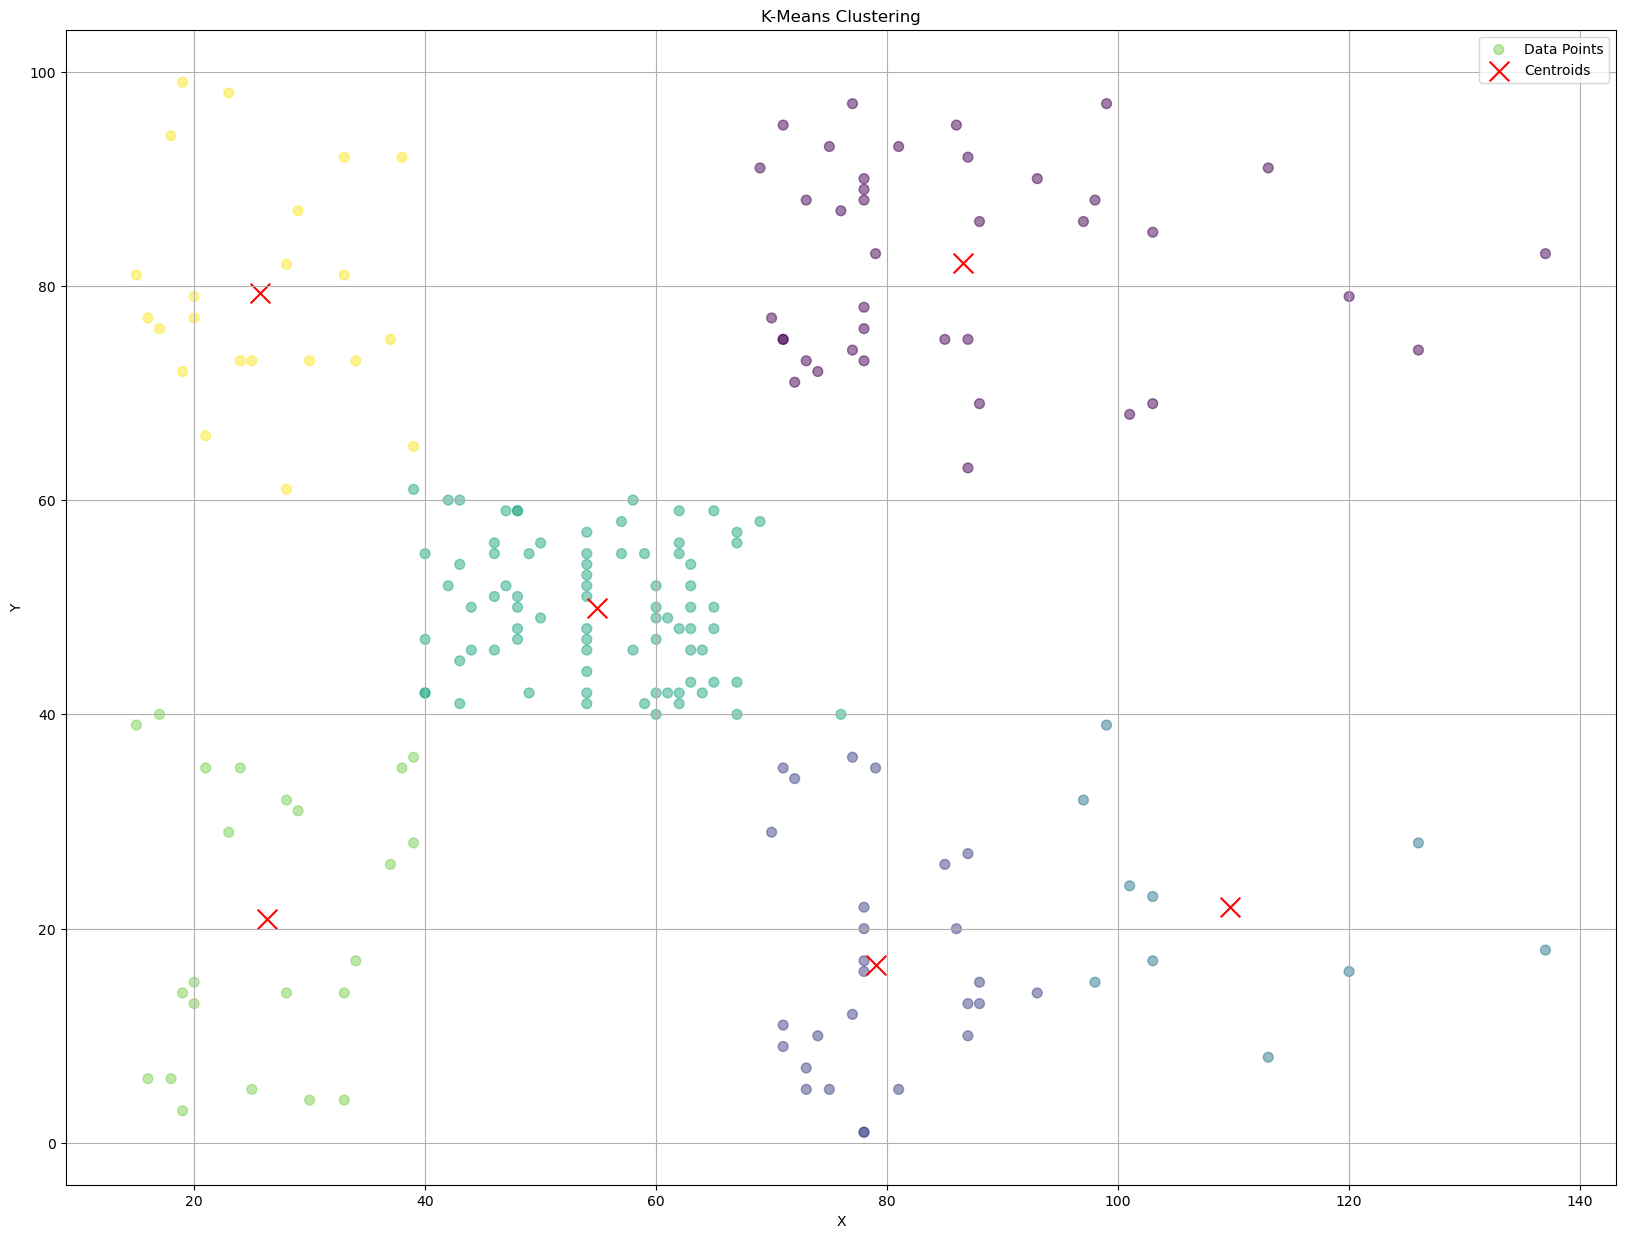

In [27]:
plt.figure(figsize=(20, 15))
plt.scatter(new_data.iloc[:, 0], new_data.iloc[:, 1], c=idx, cmap='viridis', s=50, alpha=0.5, label='Data Points')
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
def random_initial_centroids(x, k):
    # Randomly sample k data points from x as initial centroids
    indices = np.random.choice(x.shape[0], k, replace=True)
    centroids = x[indices]
    return centroids


In [58]:
k_c_norm=random_initial_centroids(norm_data.values,5)

In [59]:
new_data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [60]:
k_c_norm

array([[0.76124323, 0.64846646],
       [0.71428497, 0.69985497],
       [0.82118879, 0.57065662],
       [0.96866387, 0.24837535],
       [0.80994212, 0.58650981]])

In [61]:
norm_data = tf.keras.utils.normalize(new_data, axis=-1)

In [62]:
norm_data

,Annual Income (k$),Spending Score (1-100)
0,0.358979,0.933346
1,0.182089,0.983282
2,0.936329,0.351123
3,0.203446,0.979086
4,0.391141,0.920331
...,...,...
195,0.835249,0.549872
196,0.976187,0.216930
197,0.862286,0.506422
198,0.991479,0.130267


In [63]:
centers,idx=k_means(norm_data.values,30,k_c_norm)

K-Means iteration 0/29 Cost is  0.03380537412025763
[array([[0.7592566 , 0.65079137],
       [0.75430472, 0.65652448],
       [0.74740932, 0.66436384],
       [0.77523499, 0.63167295],
       [0.76124323, 0.64846646],
       [0.78349768, 0.62139471],
       [0.77453213, 0.63253457],
       [0.75568908, 0.65493054],
       [0.76822128, 0.6401844 ],
       [0.77962036, 0.62625242],
       [0.74807464, 0.6636146 ],
       [0.74210264, 0.67028626],
       [0.7832889 , 0.62165786],
       [0.77122303, 0.63656504],
       [0.7592566 , 0.65079137],
       [0.74045531, 0.67210559],
       [0.76165876, 0.64797835],
       [0.76728177, 0.64131013],
       [0.76548627, 0.64345223],
       [0.74983786, 0.66162164],
       [0.75740996, 0.65293962],
       [0.74825991, 0.66340569],
       [0.74404871, 0.66812537],
       [0.77128137, 0.63649434],
       [0.77884743, 0.62721342]]), array([[0.35897908, 0.93334561],
       [0.18208926, 0.983282  ],
       [0.20344646, 0.97908607],
       [0.39114064, 0

K-Means iteration 11/29 Cost is  0.004300452788284872
[array([[0.51449576, 0.85749293],
       [0.62139471, 0.78349768],
       [0.56552836, 0.82472885],
       [0.65850461, 0.75257669],
       [0.68315713, 0.73027141],
       [0.73554511, 0.67747575],
       [0.73480344, 0.6782801 ],
       [0.5386617 , 0.84252215],
       [0.51449576, 0.85749293],
       [0.5881717 , 0.80873608],
       [0.64811863, 0.76153939],
       [0.68965517, 0.72413793],
       [0.68965517, 0.72413793],
       [0.62833711, 0.77794118],
       [0.57346234, 0.81923192],
       [0.62292678, 0.78228014],
       [0.58251894, 0.81281713],
       [0.69085777, 0.72299069],
       [0.72373754, 0.69007533],
       [0.66062789, 0.75071352],
       [0.69122265, 0.72264186],
       [0.66976877, 0.74256972],
       [0.70710678, 0.70710678],
       [0.63473942, 0.77272625],
       [0.6415552 , 0.76707687],
       [0.67053967, 0.74187368],
       [0.62307701, 0.7821605 ],
       [0.6853647 , 0.72819999],
       [0.63108747, 0

K-Means iteration 25/29 Cost is  0.004300452788284872
[array([[0.51449576, 0.85749293],
       [0.62139471, 0.78349768],
       [0.56552836, 0.82472885],
       [0.65850461, 0.75257669],
       [0.68315713, 0.73027141],
       [0.73554511, 0.67747575],
       [0.73480344, 0.6782801 ],
       [0.5386617 , 0.84252215],
       [0.51449576, 0.85749293],
       [0.5881717 , 0.80873608],
       [0.64811863, 0.76153939],
       [0.68965517, 0.72413793],
       [0.68965517, 0.72413793],
       [0.62833711, 0.77794118],
       [0.57346234, 0.81923192],
       [0.62292678, 0.78228014],
       [0.58251894, 0.81281713],
       [0.69085777, 0.72299069],
       [0.72373754, 0.69007533],
       [0.66062789, 0.75071352],
       [0.69122265, 0.72264186],
       [0.66976877, 0.74256972],
       [0.70710678, 0.70710678],
       [0.63473942, 0.77272625],
       [0.6415552 , 0.76707687],
       [0.67053967, 0.74187368],
       [0.62307701, 0.7821605 ],
       [0.6853647 , 0.72819999],
       [0.63108747, 0

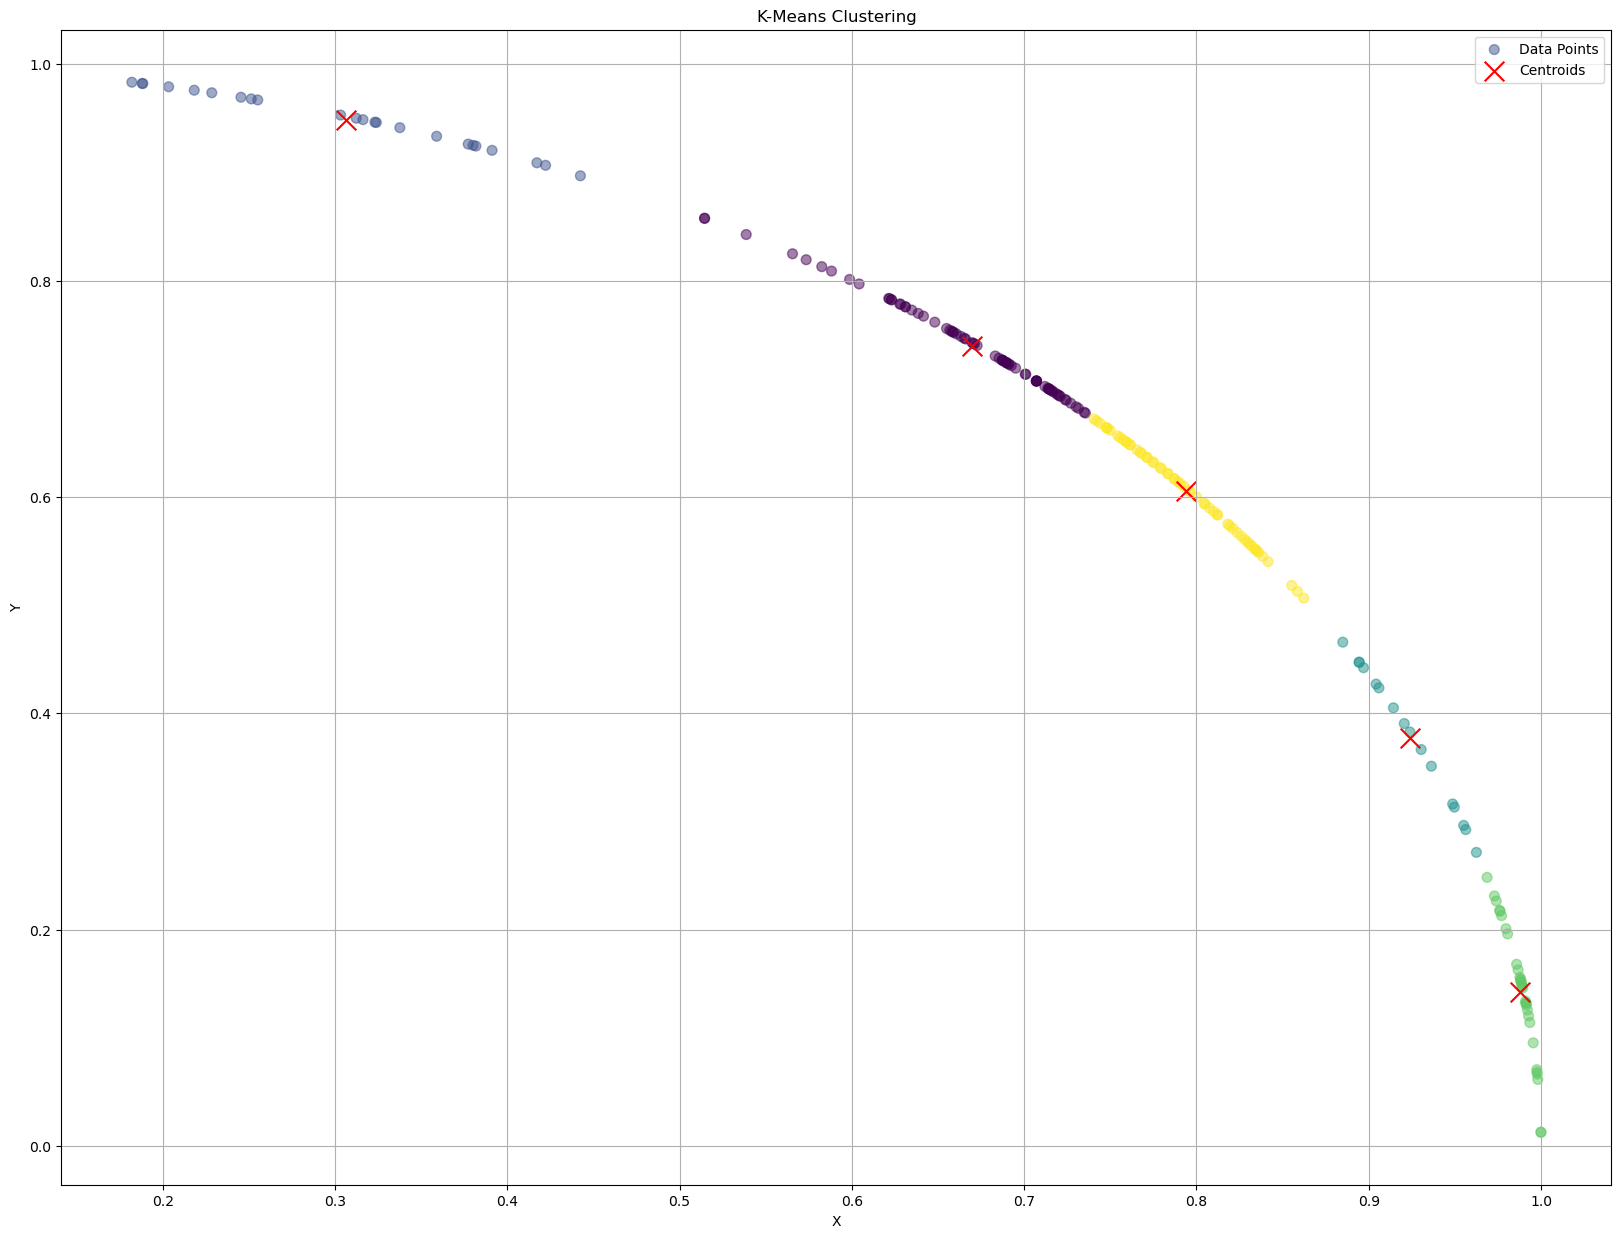

In [64]:
plt.figure(figsize=(20, 15))
plt.scatter(norm_data.iloc[:, 0], norm_data.iloc[:, 1], c=idx, cmap='viridis', s=50, alpha=0.5, label='Data Points')
plt.scatter(centers[:,0], centers[:,1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()